### Import

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# กำหนดชื่อไฟล์ Excel
file_path = 'ku.xlsx'

# โหลดข้อมูลจากไฟล์ Excel
df = pd.read_excel(file_path)

# แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
df['date'] = pd.to_datetime(df['date'])

# กำหนด 'date' เป็น index
df.set_index('date', inplace=True)

### RainFall

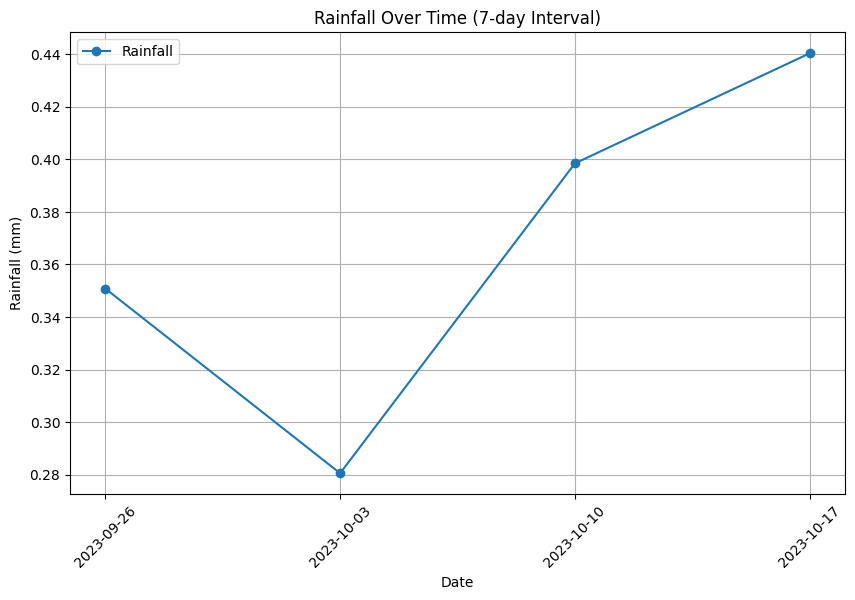

In [20]:

# สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
df_resampled = df.resample('7D').mean() 

# เลื่อน index ไป 7 วัน
df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

# # ตัดข้อมูลเฉพาะที่ต้องการแสดง
end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
df_resampled = df_resampled[df_resampled.index <= end_date]

# Plot the graph
plt.figure(figsize=(10, 6))

plt.plot(df_resampled.index, df_resampled['tp']*1000, label='Rainfall', marker='o')

# ปรับตำแหน่ง x ของ marker ให้ตรงกับข้อมูลที่ถูกรวมรวมแล้ว
plt.xticks(df_resampled.index)

plt.title('Rainfall Over Time (7-day Interval)')  # Corrected title
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')  # Adjusted unit to millimeters
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('Cumulative_Rainfall.png', bbox_inches='tight')
plt.show()